# Random Forest x IRIS 

In [20]:
import numpy
import pandas
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#autres

### Importer le dataset IRIS 

In [13]:
iris_json = load_iris()
iris_json.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [14]:
print(iris_json.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Faite un dataFrame et renommer les colonnes 

In [15]:
iris = pandas.DataFrame(iris_json['data'],columns=iris_json['feature_names']).assign(
    species = iris_json['target']
)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Définir les variables features et la target & effectuer un split 

In [19]:
X,y = iris.drop('species',axis=1),iris.species

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=.3)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((105, 4), (45, 4), (105,), (45,))

### Entrainer le classifieur 

In [21]:
clf = RandomForestClassifier(random_state=42,min_samples_split=5,max_depth=None)
clf.fit(X_train,y_train)
clf

RandomForestClassifier(min_samples_split=5, random_state=42)

### Afficher l'accuracy de votre classifieurs 

In [27]:
(clf.predict(X_test) == y_test).sum()/X_test.shape[0]

1.0

### Analyser votre classifieur, que voyez vous ? 

In [36]:
pandas.crosstab(clf.predict(X_test),y_test,rownames=['pred'],colnames=['true'])

true,0,1,2
pred,,,
0,19,0,0
1,0,13,0
2,0,0,13


### Afficher les features importances

In [42]:
clf.feature_importances_

array([0.100451  , 0.0332204 , 0.42841251, 0.43791609])

### Afficher graphiquement les features importances  

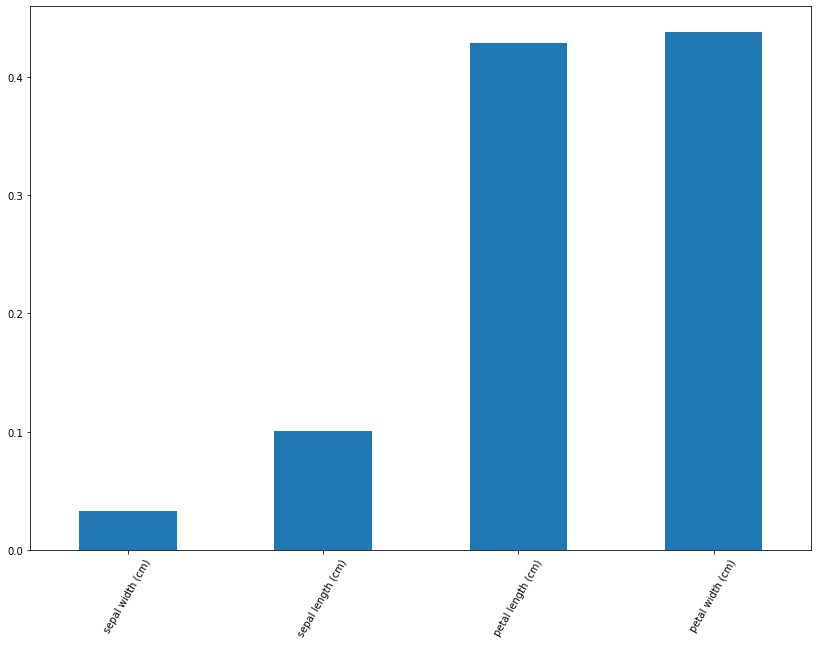

In [43]:
pandas.Series(clf.feature_importances_,index=iris_json['feature_names']).sort_values().plot(kind='bar',rot=60,figsize=(14,10))

### Entrainer votre classifieurs avec moins de features

In [48]:
clf2 = RandomForestClassifier(random_state=42,min_samples_split=5,max_depth=None)

clf2.fit(X_train.iloc[:,:2],y_train)
clf2

RandomForestClassifier(min_samples_split=5, random_state=42)

### Que constatez vous ? 

In [50]:
(clf2.predict(X_test.iloc[:,:2]) == y_test).sum()/X_test.shape[0]

0.7555555555555555